# Stage 2 

500497375

The dataset used throughout the whole process was a combination of the World Happiness Report data used from Stage 1 as well as the provided dataset given to us for Stage 2. Features such as social support and life expectancy were taken from the World Happiness Report data and suicide rates as well as universal health coverage were taken from the dataset given by the tutors/unit co-ordinator. As maintaining data cleaniness and consistency was key, rows that had blank spaces had to be removed and because of that, there were some countries that did not make it to the list. The data presented should also be relatively modern, which is why the data was kept to a year frame of 2010 and 2015. 

In [1]:
#Import data science libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

#Establish dataframe by reading from the spreadsheet
dframe = pd.read_csv("stage2-spreadsheet.csv")
dframe = pd.DataFrame(dframe, columns = ['Country Name', 'Year', 'Region', 'Social Support', 'Healthy life expectancy at birth', 
                                                'Suicide mortality rate (deaths per 100,000 population)',
                                                'Male suicide mortality rate (deaths per 100,000 population)',
                                                'Female suicide mortality rate (deaths per 100,000 population)',
                                                'Universal health coverage (UHC) service coverage index'])
#Display the dataframe created from the spreadsheet.
dframe.head()

,Country Name,Year,Region,Social Support,Healthy life expectancy at birth,"Suicide mortality rate (deaths per 100,000 population)","Male suicide mortality rate (deaths per 100,000 population)","Female suicide mortality rate (deaths per 100,000 population)",Universal health coverage (UHC) service coverage index
0,Armenia,2010,Asia,0.660,65.2,6.7,10.5,3.5,57
1,Australia,2010,Oceania,0.955,72.2,11.7,17.7,5.7,84
2,Australia,2015,Oceania,0.952,72.7,13.2,19.7,6.8,86
3,Austria,2010,Europe,0.914,71.4,16.1,25.1,7.6,76
4,Austria,2015,Europe,0.928,72.1,16.0,24.8,7.6,79


The social support values were later binned into set categories below that depicted the level of social support that a country was recieving. Social support could include social security/welfare, healthcare, general wellbeing or minimum wage. Binning them into qualitative variables gives a better understanding as to how citizens are treated compared to numbers.

In [2]:
#Categorise the social support values
binned_social_values = [0.35, 0.549, 0.699, 0.799, 1]
social_support_label = ['Low Levels of Social Support', 'Moderate Levels of Social Support', 'High Levels of Social Support', 'Very High Levels of Social Support']
#Use pandas' cut function to bin social support values
dframe['Social Support Level'] = pd.cut(dframe['Social Support'], binned_social_values, labels = social_support_label)
#Display the dataframe created from the spreadsheet.
dframe.head()

,Country Name,Year,Region,Social Support,Healthy life expectancy at birth,"Suicide mortality rate (deaths per 100,000 population)","Male suicide mortality rate (deaths per 100,000 population)","Female suicide mortality rate (deaths per 100,000 population)",Universal health coverage (UHC) service coverage index,Social Support Level
0,Armenia,2010,Asia,0.660,65.2,6.7,10.5,3.5,57,Moderate Levels of Social Support
1,Australia,2010,Oceania,0.955,72.2,11.7,17.7,5.7,84,Very High Levels of Social Support
2,Australia,2015,Oceania,0.952,72.7,13.2,19.7,6.8,86,Very High Levels of Social Support
3,Austria,2010,Europe,0.914,71.4,16.1,25.1,7.6,76,Very High Levels of Social Support
4,Austria,2015,Europe,0.928,72.1,16.0,24.8,7.6,79,Very High Levels of Social Support


## Grouped Aggregates

Below is a grouped aggregate that shows the amount of countries with varying social support levels from 2010-2015, and with that the highest social support for each binned value which ranges from low levels to very high levels. We can see that there are a high amount of countries recorded with Very High levels of social support, with 56. The lowest social support recording in the dataset was 0.549, and the highest was 0.987.

In [3]:
#Grouped aggregates for the newly binned value
dframe.groupby('Social Support Level')['Social Support'].count()

Social Support Level
Low Levels of Social Support           3
Moderate Levels of Social Support      4
High Levels of Social Support          7
Very High Levels of Social Support    56
Name: Social Support, dtype: int64

In [4]:
dframe.groupby('Social Support Level')['Social Support'].max()

Social Support Level
Low Levels of Social Support          0.549
Moderate Levels of Social Support     0.689
High Levels of Social Support         0.796
Very High Levels of Social Support    0.987
Name: Social Support, dtype: float64

This is a grouped aggregate that counts the amount of countries from each region. 

In [5]:
dframe.groupby('Region')['Country Name'].count()

Region
Africa       1
Americas     5
Asia        20
Europe      40
Oceania      4
Name: Country Name, dtype: int64

## Pie Chart

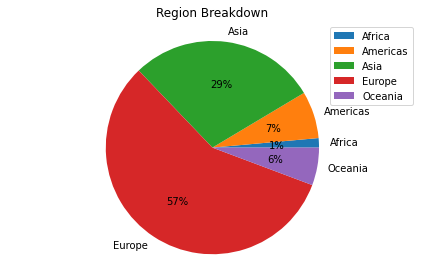

In [6]:
#pie chart showing region breakdown of the countries available in spreadsheet
region_sums = dframe.groupby('Region')['Country Name'].count()
plt.axis('equal')
plt.pie(region_sums, labels = region_sums.index, autopct = '%1.0f%%')

#Title and legend
plt.title("Region Breakdown")
plt.legend()

#Display
plt.tight_layout()
plt.show()

I wanted to do take my region group aggregate and do a simple pie chart that noted down the simple breakdown of the regions present in the dataset. To add more detail the percentage breakdown was included in the pie chart and a legend that noted down the rgion and their colour. Europe has a high presence, with 57% of the countries coming from Europe, followed by Asia with 29%.

While a bar graph could've also been done to represent the regional breakdown, the pie chart is more compactly designed and the proportions are easier to spot out, hence the decision to graph the regional breakdown has been made.

## Scatterplots

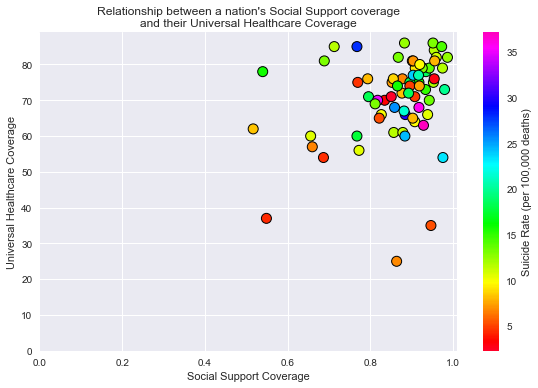

In [7]:
plt.style.use('seaborn')

#Collect aspects of the dataframe to use for the scatterplot
social_support = dframe['Social Support']
healthcare_coverage = dframe['Universal health coverage (UHC) service coverage index']
suicide_rate = dframe['Suicide mortality rate (deaths per 100,000 population)']

#Create the scatterplot
plt.scatter(social_support, healthcare_coverage, c = suicide_rate, cmap = 'gist_rainbow', s = 100, alpha = 1,
            edgecolor = 'black', linewidth = 1)

#Display varying suicide rates by using a colourbar
cbar = plt.colorbar()
cbar.set_label('Suicide Rate (per 100,000 deaths)')

#Labels and titles
plt.title("Relationship between a nation's Social Support coverage\nand their Universal Healthcare Coverage")
plt.xlabel('Social Support Coverage')
plt.ylabel('Universal Healthcare Coverage')
plt.xlim(xmin = 0)
plt.ylim(ymin = 0)


#Display
plt.tight_layout()
plt.show()

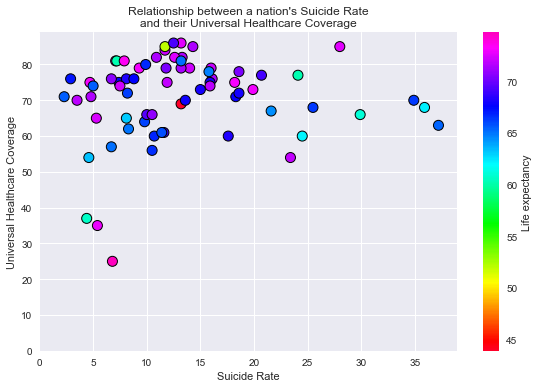

In [8]:
plt.style.use('seaborn')

#Collect aspects of the dataframe to use for the scatterplot
life_expectancy = dframe['Healthy life expectancy at birth']
healthcare_coverage = dframe['Universal health coverage (UHC) service coverage index']
suicide_rate = dframe['Suicide mortality rate (deaths per 100,000 population)']

#create the scatterplot
plt.scatter(suicide_rate, healthcare_coverage, c = life_expectancy, cmap = 'gist_rainbow', s = 100, alpha = 1,
            edgecolor = 'black', linewidth = 1)

#Display varying life expectancy rates by using a colourbar
cbar = plt.colorbar()
cbar.set_label('Life expectancy')

#Labels and titles
plt.title("Relationship between a nation's Suicide Rate\nand their Universal Healthcare Coverage")
plt.xlabel('Suicide Rate')
plt.ylabel('Universal Healthcare Coverage')
plt.xlim(xmin = 0)
plt.ylim(ymin = 0)

#Display
plt.tight_layout()
plt.show()

Having a look at both scatterplots, we can deduce that there is quite a strong relationship between what both plots were trying to compare against each other. For the first scatterplot, we can see that for countries that have a high amount of both universal healthcare coverage and social support coverage, that the suicide rate is pretty low, as the shades of blue are relatively light. However, it is evident that there are countries that have both good coverage rates of social support and universal healthcare coverage, and their suicide rates are still quite high, in which external factors come into play that cannot explained by the data available, and further research will have to be done to explain this question.

The relationship between suicide rate and universal healthcare coverage was also analysed, and for the most part a relationship can be established. As with the first scatterplot, a lot of the points in the chart reside within one area of the chart (top left compared to top right in the first chart). The majority of the data points being on the top-side of the map tells us that for the most part, high universal health coverage correlates to high life expectancy and for the most part a low suicide rate, however there are countries with a high suicide rate but good universal healthcare coverage and good life expectancy. The relationship however is not as strong as the first scatterplot, with the points being more spreadout compared to the first scatterplot which was a lot more compact. 

Originally a singular colour was used for both scatterplots and while the different shades were distinguishable, the colour map always started off with the colour white so for the best interests of readability for the reason that the different rates of life expectancy and suicide rates are able to be distinguished better, a rainbow colourmap was eventually used. 

## Grouped Bar Charts

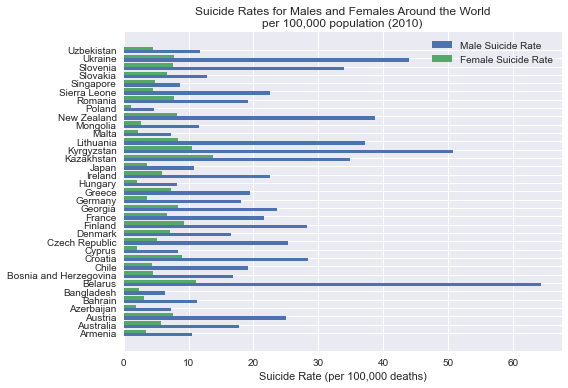

In [9]:
#Filter for data from 2010
dframe_2010 = dframe[dframe['Year'] == 2010]

#Configure actual bars
x = np.arange(len(dframe_2010['Country Name']))  # the label locations
width = 0.4  # the width of the bars
fig, ax = plt.subplots()
rects1 = ax.barh(x - width/2, dframe_2010['Male suicide mortality rate (deaths per 100,000 population)'], width, label='Male Suicide Rate')
rects2 = ax.barh(x + width/2, dframe_2010['Female suicide mortality rate (deaths per 100,000 population)'], width, label='Female Suicide Rate')

#Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_xlabel('Suicide Rate (per 100,000 deaths)')
ax.set_title('Suicide Rates for Males and Females Around the World\nper 100,000 population (2010)')
ax.set_yticks(x)
ax.set_yticklabels(dframe_2010['Country Name'])
ax.legend()

fig.tight_layout()

plt.show()

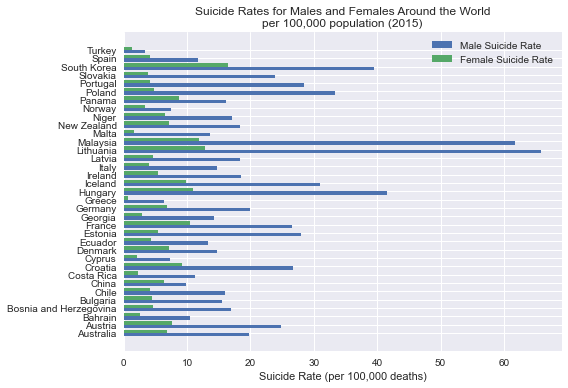

In [10]:
#Filter for data from 2010
dframe_2015 = dframe[dframe['Year'] == 2015]

#Configure actual bars
x = np.arange(len(dframe_2015['Country Name']))  # the label locations
width = 0.4  # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.barh(x - width/2, dframe_2015['Male suicide mortality rate (deaths per 100,000 population)'], width, label='Male Suicide Rate')
rects2 = ax.barh(x + width/2, dframe_2015['Female suicide mortality rate (deaths per 100,000 population)'], width, label='Female Suicide Rate')

#Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_xlabel('Suicide Rate (per 100,000 deaths)')
ax.set_title('Suicide Rates for Males and Females Around the World\nper 100,000 population (2015)')
ax.set_yticks(x)
ax.set_yticklabels(dframe_2015['Country Name'])
ax.legend()

fig.tight_layout()

plt.show()

Looking at the two grouped barplots above, what is alarmingly clear from both charts is the absurdly very high overall male suicide for every country analysed, with the lowest ratio being a 2:1 ratio between males and females, with China being the exception. Countries with astoundingly high male suicide rates include Malaysia, Lituania, Hungary, Belarus and South Korea. Reasons for such an astoundingly high suicide rate for males and additional resources are available in Part B of the report. 